In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np


f = open('../data/red_blood_cell_data.txt', 'r')
score = []
f.readline()
items = []
for line in f:
    item = line[:-1].split('\t')
    item = [float(num) for num in item]
    items.append(item)
items = np.array(items)
mean = items.mean(axis=0)
var = items.var(axis=0, ddof=1)
print(items)

[[7.97 8.06]
 [7.66 8.27]
 [7.59 8.45]
 [8.44 8.05]
 [8.05 8.51]
 [8.08 8.14]
 [8.35 8.09]
 [7.77 8.15]
 [7.98 8.16]
 [8.15 8.42]]


## 平均値の差のt検定

95%信頼区間: 7.806611033742144 <= 8.004000000000001 <= 8.20138896625786
95%信頼区間: 8.107295494438269 <= 8.23 <= 8.352704505561732


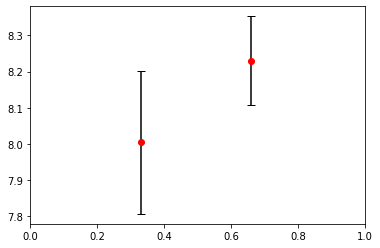

In [3]:
from scipy import stats

t_norm = stats.t(df=9)
bounds = t_norm.ppf(0.975)
bounds = bounds*np.sqrt(var/10)

for i in range(2):
    print('95%信頼区間: {} <= {} <= {}'.format(mean[i]-bounds[i], mean[i], mean[i]+bounds[i]))

    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x_list = [.33, .66]
y_list = mean

#エラーバーの範囲
interval_list = bounds

#各エラーバーの描画
for x, y, interval in zip(x_list, y_list, interval_list):
    ax.errorbar(x, y, interval, fmt='ro', capsize=4, ecolor='black')
plt.xlim(0,1)
#plt.ylim(0,12)
plt.show()

In [12]:
mean_diff = mean[1]-mean[0]
var_p = (9*var[0] + 9*var[1])/18
t = mean_diff/np.sqrt(var_p/10)
t_norm = stats.t(df=18)
bounds = t_norm.ppf(0.975)
bounds = bounds*np.sqrt(var_p * (1/10 + 1/10))

print('95%信頼区間: {} <= {} <= {}'.format(mean_diff-bounds, mean_diff, mean_diff+bounds))

print('t = ', t)
t_kimu = stats.t(df=18)
kikyaku = t_kimu.ppf(0.975)
print('棄却域:  |t| > ',kikyaku)

95%信頼区間: 0.010146235120252423 <= 0.2259999999999991 <= 0.44185376487974576
t =  3.110811861198144
棄却域:  |t| >  2.10092204024096


## p値とサンプル数の関係

In [15]:

data = np.random.normal(loc = 0,  scale = 1,  size  = (2,5))
p = [stats.ttest_ind(data[0],data[1], equal_var = True)[1]]
t_norm = stats.t(df=8)
bound = t_norm.ppf(0.975)
means = data.mean(axis=1)
var = data.var(axis=1)
mean_diff = [means[1]-means[0]]
var_p = (4*var[0] + 4*var[1])/8
bounds = [bound*np.sqrt(var_p * (1/5 + 1/5))]

for i in range(10000-5):
    data = np.concatenate([data, np.random.normal(loc=0, scale=1, size  = (2,1))], axis=1)
    p.append(stats.ttest_ind(data[0],data[1], equal_var = True)[1])
    means = data.mean(axis=1)
    var = data.var(axis=1)
    mean_diff.append(means[1]-means[0])
    t_norm = stats.t(df=2*(5+i))
    bound = t_norm.ppf(0.975)
    var_p = ((i+5)*var[0] + (i+5)*var[1])/(2*(i+5))
    bounds = np.append(bounds, bound*np.sqrt(var_p * (1/(i+6) + 1/(i+6))))

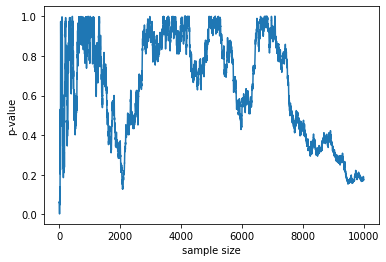

In [16]:
plt.figure()
plt.plot(range(5,10001), p)
plt.xlabel('sample size')
plt.ylabel('p-value')
plt.show()

サンプル数を適当にいじってやり直せば有意差ありという結論が恣意的に導けてしまうので，
## 値とその信頼区間を書くようにしよう！

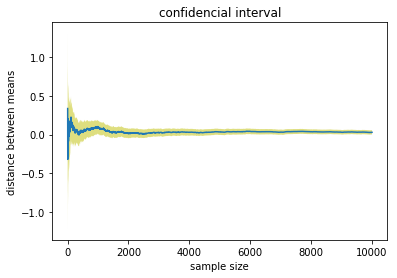

In [14]:
plt.figure()
plt.plot(range(5,10001), mean_diff)
plt.fill_between(range(5,10001), mean_diff - bounds, mean_diff + bounds, facecolor='y',alpha=0.5)
plt.xlabel('sample size')
plt.ylabel('distance between means')
plt.title('confidencial interval')
plt.show()